# Addressing Reviewer Comments

- Temperature and Salinity have fairly extensive QC procedures built into the glider software.  These procedures handle spikes, trapped water, low flow through the unpumped ctd, thermal-inertia corrections and other anomlies.  Additional sensors go through basic sanity checks and field checks but are otherwise not part of the additional QC process.

- Information regarding the glider QC procedures can be found in the sea glider manual version 1.14 Revision 2017 online and available from Kongsberg (https://www.ego-network.org/dokuwiki/lib/exe/fetch.php?media=public:datamanagement:seagliderqualitycontrolmanual.pdf)

In [1]:
import pandas as pd

## Dives to compare at start and end?

Deployment - HE1701c001 (two bottles at site too and was first cast of healy field season)   first 10 dives? (dives 3-13)
Recovery - (2017-09-26T16:05:42Z) - dy1708c021 (or so) - last 10 dives (3600)

### Grab first 10 and last 10 dives to compare to dyson/healy casts

In [121]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np
import xarray as xa

server_url = 'http://pavlof.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=server_url)
df = pd.read_csv(e.get_search_url(response='csv', search_for='sg'))
print(df['Dataset ID'].values)

dataset_id='sg401_2017'

constraints={
    'profileid>=':"p4013000"
}

try:
    d = ERDDAP(server=server_url,
        protocol='tabledap',
        response='csv'
    )
    d.dataset_id = dataset_id
    d.variables = ['profileid','time','depth','latitude','longitude','wlbb2fl_sig695nm_adjusted','salinity','salinity_qc','temperature','temperature_qc']
    d.constraints = constraints
except:
    print('Failed to generate url {}'.format(dataset_id))

try:
    df_m = d.to_pandas(
                index_col='time (UTC)',
                parse_dates=True,
                skiprows=(1,)  # units information can be dropped.
                )
    df_m.sort_index(inplace=True)
    df_m.columns = [x[1].split()[0] for x in enumerate(df_m.columns)]

except:
    print(f"something failed in data download {dataset_id}")
    pass

['sg402_EcoFOCI_2019' 'sg401_2017_merged' 'usgsCeSS111'
 'sg401_EcoFOCI_2019' 'sg403_PS_spring18' 'sg403_EcoFOCI_2019'
 'sg404_BF_Summer18' 'sg404_EcoFOCI_2019' 'sg401_2017' 'etopo5'
 'erdGtsppBest']


In [123]:
df_m

,profileid,depth,latitude,longitude,wlbb2fl_sig695nm_adjusted,salinity,salinity_qc,temperature,temperature_qc
time (UTC),,,,,,,,,
2017-09-16 20:39:34+00:00,p4013000,0.000000,58.856022,-170.368295,1.056,NaN,4,7.925312,1
2017-09-16 20:39:46+00:00,p4013000,-0.139599,58.856022,-170.368295,0.960,NaN,4,7.922408,1
2017-09-16 20:39:52+00:00,p4013000,-0.079771,58.856022,-170.368295,0.960,NaN,4,7.925734,8
2017-09-16 20:39:59+00:00,p4013000,-0.079771,58.856022,-170.368295,0.936,NaN,4,7.928790,8
2017-09-16 20:40:05+00:00,p4013000,-0.069800,58.856022,-170.368295,1.044,NaN,4,7.931852,8
...,...,...,...,...,...,...,...,...,...
2017-09-26 15:05:11+00:00,p4013609,5.414792,57.927614,-169.088382,NaN,31.460751,1,7.031394,1
2017-09-26 15:05:23+00:00,p4013609,4.028699,57.927643,-169.088396,NaN,31.460339,1,7.031925,1
2017-09-26 15:05:35+00:00,p4013609,2.612680,57.927669,-169.088423,NaN,NaN,3,7.031546,1


In [110]:
e = ERDDAP(server=server_url)
df = pd.read_csv(e.get_search_url(response='csv', search_for='CTD'))
print(df['Dataset ID'].values)

dataset_id='CTD_hly1701'

constraints={
    'station_id<=':"he1701c001_ctd.cf"
}

try:
    d = ERDDAP(server=server_url,
        protocol='tabledap',
        response='csv'
    )
    d.dataset_id = dataset_id
    d.constraints = constraints
except:
    print('Failed to generate url {}'.format(dataset_id))

try:
    df_d = d.to_pandas(
                index_col='time (UTC)',
                parse_dates=True,
                skiprows=(1,)  # units information can be dropped.
                )
    df_d.sort_index(inplace=True)
    df_d.columns = [x[1].split()[0] for x in enumerate(df_d.columns)]

except:
    print(f"something failed in data download {dataset_id}")
    pass

['CTD_hly1701' 'CTD_hly1702' 'CTD_dy1708_final' 'CTD_dy1908_preliminary'
 'sg402_EcoFOCI_2019' 'sg403_PS_spring18' 'sg404_BF_Summer18'
 'sg401_EcoFOCI_2019' 'sg403_EcoFOCI_2019' 'sg404_EcoFOCI_2019'
 'sg401_2017' 'erdGtsppBest']


In [111]:
df_d

,station_id,pressure,latitude,longitude,S_42,S_41,ST_70,F_903,NH4_189,T_28,OST_62,O_65,T2_35,BTL_103,Tr_904,SI_188,PO4_186,NO2_184,NO3_182
time (UTC),,,,,,,,,,,,,,,,,,,
2017-07-26 16:55:44+00:00,he1701c001_ctd.cf,1.0,59.2375,189.57483,31.1216,30.4950,23.553528,0.3362,NaN,9.2577,100.592125,289.990,9.2569,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-26 16:55:44+00:00,he1701c001_ctd.cf,2.0,59.2375,189.57483,31.1216,30.4950,23.553528,0.3362,NaN,9.2577,100.592125,289.990,9.2569,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-26 16:55:44+00:00,he1701c001_ctd.cf,3.0,59.2375,189.57483,31.6145,31.5805,24.401733,0.3503,NaN,9.2579,100.775490,288.252,9.2574,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-26 16:55:44+00:00,he1701c001_ctd.cf,4.0,59.2375,189.57483,31.6379,31.6370,24.445923,0.3483,NaN,9.2576,101.073310,288.988,9.2574,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-26 16:55:44+00:00,he1701c001_ctd.cf,5.0,59.2375,189.57483,31.6376,31.6376,24.446533,0.3520,NaN,9.2574,100.925340,288.565,9.2567,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-26 16:55:44+00:00,he1701c001_ctd.cf,60.0,59.2375,189.57483,31.5810,31.5831,25.302612,0.9816,NaN,0.9266,107.052246,373.434,0.9272,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-26 16:55:44+00:00,he1701c001_ctd.cf,61.0,59.2375,189.57483,31.5808,31.5830,25.302490,0.7881,NaN,0.9277,106.981220,373.176,0.9283,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-26 16:55:44+00:00,he1701c001_ctd.cf,62.0,59.2375,189.57483,31.5808,31.5830,25.302368,0.8611,NaN,0.9282,107.021866,373.313,0.9288,NaN,NaN,NaN,NaN,NaN,NaN


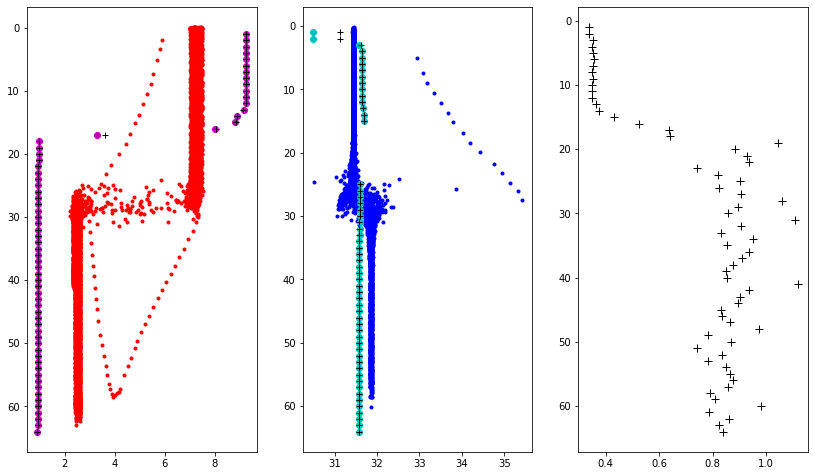

In [112]:
#plot first - roughly following 6hours after deployment

import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(14, 18))

ax=plt.subplot(231)
plt.plot(df_m.temperature,df_m.depth,'r.')
plt.plot(df_d.T_28,df_d.pressure,'mo',markersize=6)
plt.plot(df_d.T2_35,df_d.pressure,'k+',markersize=6)
ax.invert_yaxis()

ax=plt.subplot(232)
plt.plot(df_m.salinity,df_m.depth,'b.')
plt.plot(df_d.S_41,df_d.pressure,'co',markersize=6)
plt.plot(df_d.S_42,df_d.pressure,'k+',markersize=6)
ax.invert_yaxis()

ax=plt.subplot(233)
plt.plot(df_m.wlbb2fl_sig695nm_adjusted,df_m.depth,'g.')
plt.plot(df_d.F_903,df_d.pressure,'k+',markersize=8)
ax.invert_yaxis()


In [113]:
e = ERDDAP(server=server_url)
df = pd.read_csv(e.get_search_url(response='csv', search_for='CTD'))
print(df['Dataset ID'].values)

dataset_id='CTD_dy1708_final'

constraints={
    'profile_id=':"dy1708c020_ctd"
}

try:
    d = ERDDAP(server=server_url,
        protocol='tabledap',
        response='csv'
    )
    d.dataset_id = dataset_id
    d.constraints = constraints
except:
    print('Failed to generate url {}'.format(dataset_id))

try:
    df_d = d.to_pandas(
                index_col='time (UTC)',
                parse_dates=True,
                skiprows=(1,)  # units information can be dropped.
                )
    df_d.sort_index(inplace=True)
    df_d.columns = [x[1].split()[0] for x in enumerate(df_d.columns)]

except:
    print(f"something failed in data download {dataset_id}")
    pass

['CTD_hly1701' 'CTD_hly1702' 'CTD_dy1708_final' 'CTD_dy1908_preliminary'
 'sg402_EcoFOCI_2019' 'sg403_PS_spring18' 'sg404_BF_Summer18'
 'sg401_EcoFOCI_2019' 'sg403_EcoFOCI_2019' 'sg404_EcoFOCI_2019'
 'sg401_2017' 'erdGtsppBest']


In [114]:
df_d

,profile_id,pressure,latitude,longitude,S_42,S_41,ST_70,F_903,T_28,OST_62,O_65,T2_35,BTL_103,Tr_904,Water_Depth,air_pressure_at_sealevel,wind_direction,wind_speed,air_temperature,Station_Name
time (UTC),,,,,,,,,,,,,,,,,,,,
2017-09-26 10:40:29+00:00,dy1708c020_ctd,1.0,57.927166,190.68033,31.462700,31.4642,24.593018,2.6665,7.3135,101.404940,303.22516,7.3140,NaN,NaN,67.0,1013.0,17.0,18.0,6.6,M4W
2017-09-26 10:40:29+00:00,dy1708c020_ctd,2.0,57.927166,190.68033,31.462700,31.4642,24.593018,2.6665,7.3135,101.404950,303.22516,7.3140,NaN,NaN,67.0,1013.0,17.0,18.0,6.6,M4W
2017-09-26 10:40:29+00:00,dy1708c020_ctd,3.0,57.927166,190.68033,31.462700,31.4642,24.593018,2.6665,7.3135,101.404950,303.22516,7.3140,NaN,NaN,67.0,1013.0,17.0,18.0,6.6,M4W
2017-09-26 10:40:29+00:00,dy1708c020_ctd,4.0,57.927166,190.68033,31.462599,31.4641,24.592896,2.7479,7.3136,101.265920,302.80890,7.3139,NaN,NaN,67.0,1013.0,17.0,18.0,6.6,M4W
2017-09-26 10:40:29+00:00,dy1708c020_ctd,5.0,57.927166,190.68033,31.462700,31.4641,24.592896,2.7271,7.3137,101.284580,302.86417,7.3141,NaN,NaN,67.0,1013.0,17.0,18.0,6.6,M4W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-26 10:40:29+00:00,dy1708c020_ctd,59.0,57.927166,190.68033,31.997000,31.9980,25.516235,0.2062,2.6703,67.324790,223.98799,2.6701,NaN,NaN,67.0,1013.0,17.0,18.0,6.6,M4W
2017-09-26 10:40:29+00:00,dy1708c020_ctd,60.0,57.927166,190.68033,31.997200,31.9982,25.516480,0.2168,2.6708,67.313730,223.94789,2.6705,NaN,NaN,67.0,1013.0,17.0,18.0,6.6,M4W
2017-09-26 10:40:29+00:00,dy1708c020_ctd,61.0,57.927166,190.68033,31.997099,31.9980,25.516113,0.2236,2.6717,67.345060,224.04762,2.6715,NaN,NaN,67.0,1013.0,17.0,18.0,6.6,M4W


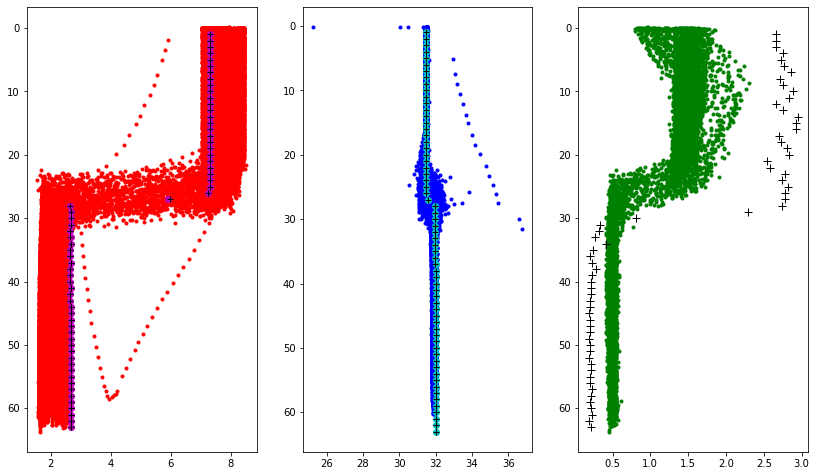

In [122]:
#plot first - roughly following 6hours after deployment

import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(14, 18))

ax=plt.subplot(231)
plt.plot(df_m.temperature,df_m.depth,'r.')
plt.plot(df_d.T_28,df_d.pressure,'mo',markersize=6)
plt.plot(df_d.T2_35,df_d.pressure,'k+',markersize=6)
ax.invert_yaxis()

ax=plt.subplot(232)
plt.plot(df_m.salinity,df_m.depth,'b.')
plt.plot(df_d.S_41,df_d.pressure,'co',markersize=6)
plt.plot(df_d.S_42,df_d.pressure,'k+',markersize=6)
ax.invert_yaxis()

ax=plt.subplot(233)
plt.plot(df_m.wlbb2fl_sig695nm_adjusted,df_m.depth,'g.')
plt.plot(df_d.F_903,df_d.pressure,'k+',markersize=8)
ax.invert_yaxis()
